In [1]:
import numpy as np
from pyscf import gto, scf, mcscf
import jax
from jax import random

from qmc.pyscftools import orbital_evaluator_from_pyscf
from qmc.setting import initialize_calculation, determine_complex_settings
from qmc.mc import limdrift
from qmc.orbitals import *
from qmc.determinants import *
from qmc.extract import *
from qmc.mc import vmc
from qmc.plot import *

import pyscf
import pyqmc.api as pyq
import warnings


In [13]:
warnings.filterwarnings("ignore")

key = jax.random.PRNGKey(seed=42)

mol = pyscf.gto.M(
    atom="""
         H 0. 0. 0.;
         H 0. 0. 2.0
         """,
    basis="sto-3g",
    unit="bohr",
    verbose=0,
)

nconfig, seed = 10, 42

coords, max_orb, det_coeff, det_map, mo_coeff, occup_hash, _nelec, nelec = \
    initialize_calculation(mol, nconfig, seed)
    
iscomplex, mo_dtype, get_phase = \
    determine_complex_settings(mo_coeff, det_coeff)

coords = jnp.array(coords)
atom_coords = jnp.array(mol.atom_coords())
atom_charges = jnp.array(mol.atom_charges())

In [14]:
results = vmc(
         coords = coords, 
         mol = mol,
         atom_charges = atom_charges,
         atom_coords = atom_coords,
         mo_coeff = mo_coeff, 
         det_coeff = det_coeff, 
         det_map = det_map, 
         _nelec = _nelec, 
         occup_hash = occup_hash,
         get_phase = get_phase,
         key = key, 
         equilibration_step=500, 
         tstep=0.5,
         n_blocks=10,
         nsteps_per_block=100,
         blockoffset=0,
         mode="symmetric",
         compute_autocorr=True,
         autocorr_length=20
      )

Starting equilibriation : 500 steps
Step 500 Acceptance: 0.5000997185707092
Starting production : 10 blocks of 100 steps
Block 1/10, Energy: -0.968844 ± 0.060393, Acceptance: 0.4900
Maximum ages: [11 13]
Block 2/10, Energy: -1.012955 ± 0.074805, Acceptance: 0.5140
Maximum ages: [11 13]
Block 3/10, Energy: -1.191266 ± 0.087741, Acceptance: 0.4995
Maximum ages: [11 16]
Block 4/10, Energy: -0.955549 ± 0.081938, Acceptance: 0.5045
Maximum ages: [11 16]
Block 5/10, Energy: -1.028726 ± 0.078821, Acceptance: 0.5185
Maximum ages: [12 16]
Block 6/10, Energy: -1.065604 ± 0.061091, Acceptance: 0.5060
Maximum ages: [12 17]
Block 7/10, Energy: -1.066772 ± 0.055762, Acceptance: 0.5220
Maximum ages: [12 17]
Block 8/10, Energy: -0.979158 ± 0.069598, Acceptance: 0.4925
Maximum ages: [25 17]
Block 9/10, Energy: -0.991132 ± 0.078926, Acceptance: 0.4835
Maximum ages: [25 17]
Block 10/10, Energy: -1.014447 ± 0.064565, Acceptance: 0.5015
Maximum ages: [25 17]

Final energy: -1.027445 ± 0.020609
Average acce

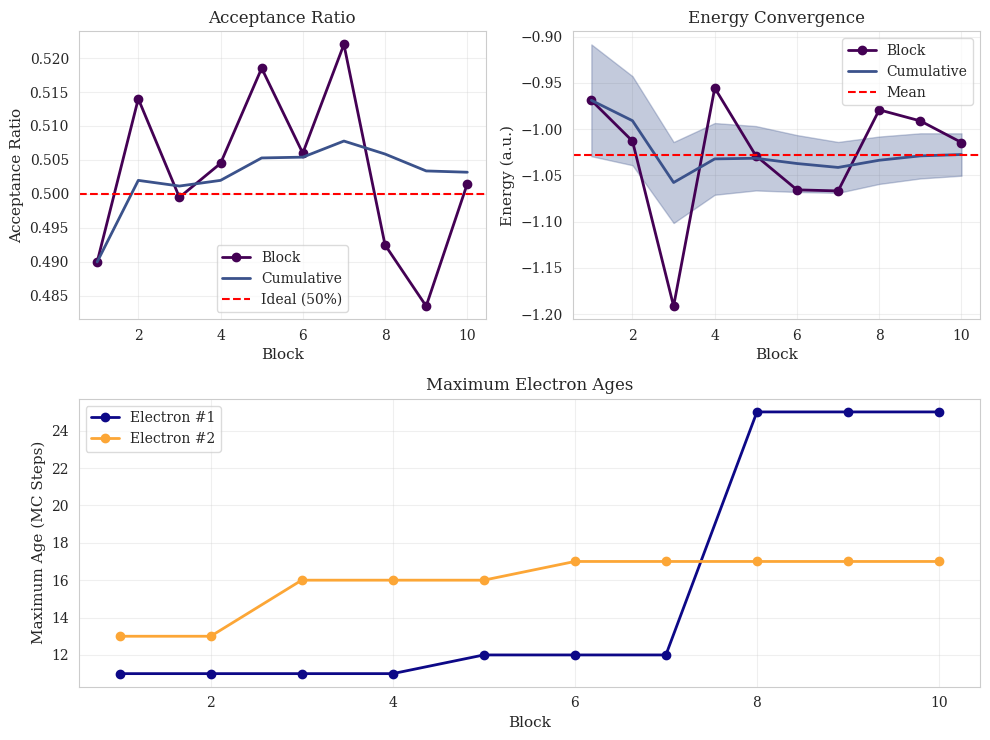

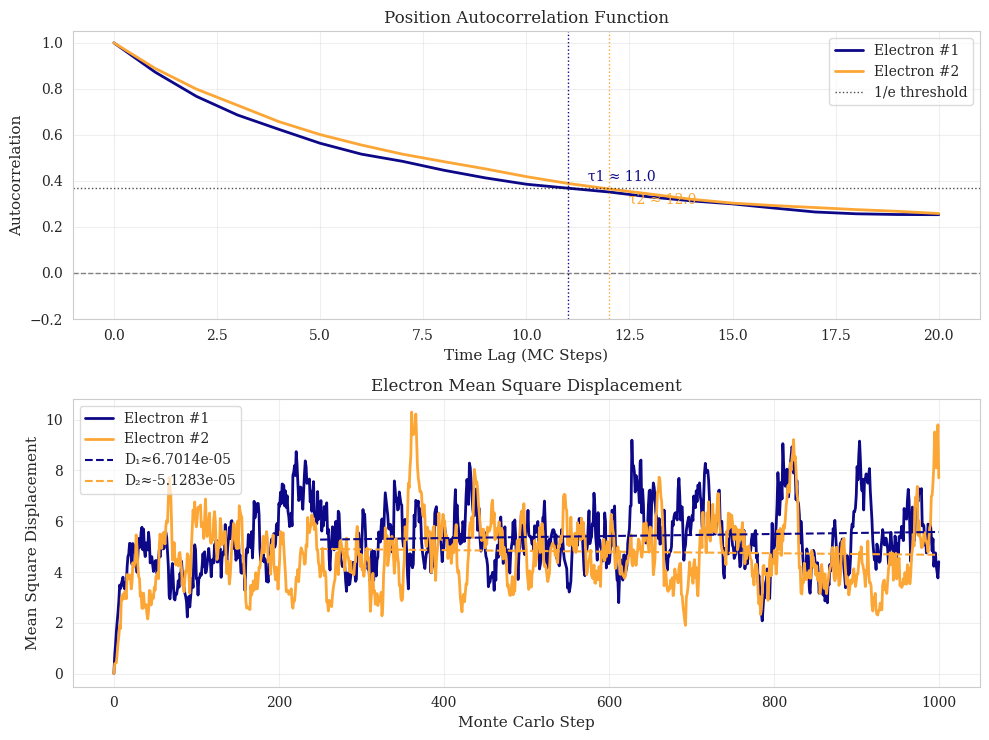

Analysis complete for !


{'Energy': '-1.027445 ± 0.020609',
 'Acceptance': '0.5032',
 'Max_Age_E1': '25',
 'Max_Age_E2': '17',
 'Autocorr_Time_E1': np.int64(12),
 'Diffusion_E1': '6.7014e-05',
 'Diffusion_E2': '-5.1283e-05'}

In [15]:
create_powerpoint_plots(results, save_plots=True, plot_dir ="./plots_Nconfig_SM_10", dpi = 300)

In [16]:
warnings.filterwarnings("ignore")

key = jax.random.PRNGKey(seed=42)

mol = pyscf.gto.M(
    atom="""
         H 0. 0. 0.;
         H 0. 0. 2.0
         """,
    basis="sto-3g",
    unit="bohr",
    verbose=0,
)

nconfig, seed = 100, 42

coords, max_orb, det_coeff, det_map, mo_coeff, occup_hash, _nelec, nelec = \
    initialize_calculation(mol, nconfig, seed)
    
iscomplex, mo_dtype, get_phase = \
    determine_complex_settings(mo_coeff, det_coeff)

coords = jnp.array(coords)
atom_coords = jnp.array(mol.atom_coords())
atom_charges = jnp.array(mol.atom_charges())

In [17]:
results = vmc(
         coords = coords, 
         mol = mol,
         atom_charges = atom_charges,
         atom_coords = atom_coords,
         mo_coeff = mo_coeff, 
         det_coeff = det_coeff, 
         det_map = det_map, 
         _nelec = _nelec, 
         occup_hash = occup_hash,
         get_phase = get_phase,
         key = key, 
         equilibration_step=500, 
         tstep=0.5,
         n_blocks=10,
         nsteps_per_block=100,
         blockoffset=0,
         mode="symmetric",
         compute_autocorr=True,
         autocorr_length=20
      )

Starting equilibriation : 500 steps
Step 500 Acceptance: 0.5103100538253784
Starting production : 10 blocks of 100 steps
Block 1/10, Energy: -1.033987 ± 0.076867, Acceptance: 0.5057
Maximum ages: [15 16]
Block 2/10, Energy: -1.050752 ± 0.093524, Acceptance: 0.5076
Maximum ages: [23 24]
Block 3/10, Energy: -1.044895 ± 0.096311, Acceptance: 0.5047
Maximum ages: [23 24]
Block 4/10, Energy: -1.101280 ± 0.109490, Acceptance: 0.5052
Maximum ages: [23 24]
Block 5/10, Energy: -1.024896 ± 0.079107, Acceptance: 0.5038
Maximum ages: [23 24]
Block 6/10, Energy: -1.079332 ± 0.130356, Acceptance: 0.5069
Maximum ages: [23 24]
Block 7/10, Energy: -1.025159 ± 0.087226, Acceptance: 0.5054
Maximum ages: [23 24]
Block 8/10, Energy: -1.041073 ± 0.075266, Acceptance: 0.5118
Maximum ages: [23 24]
Block 9/10, Energy: -1.042784 ± 0.076341, Acceptance: 0.5095
Maximum ages: [23 25]
Block 10/10, Energy: -1.074143 ± 0.108165, Acceptance: 0.5057
Maximum ages: [23 25]

Final energy: -1.051830 ± 0.007551
Average acce

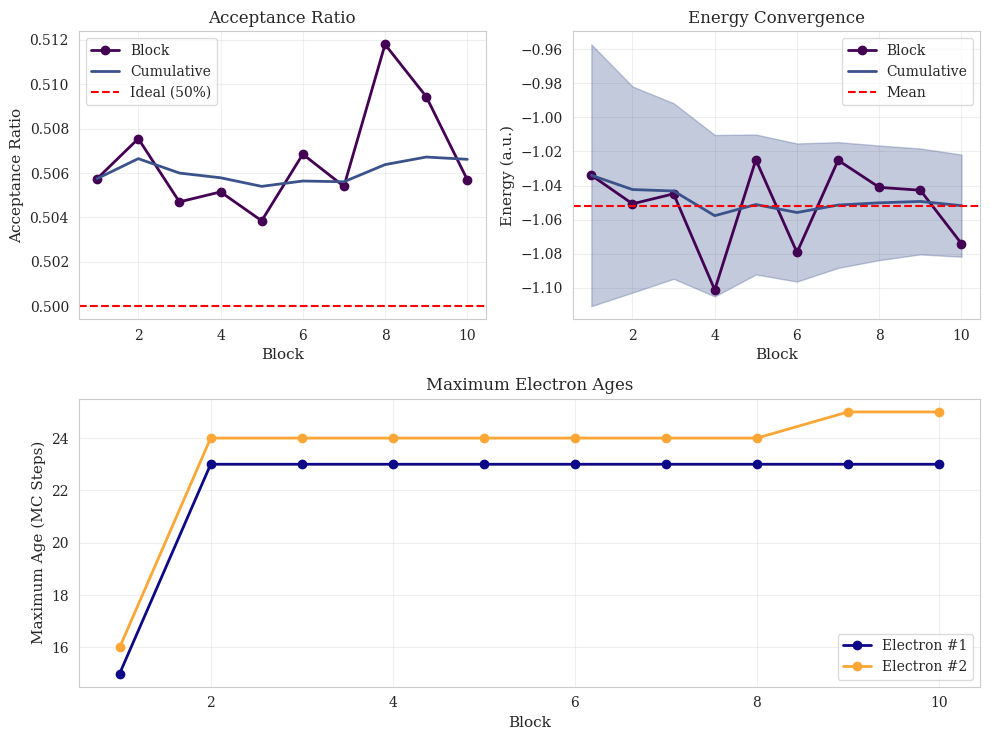

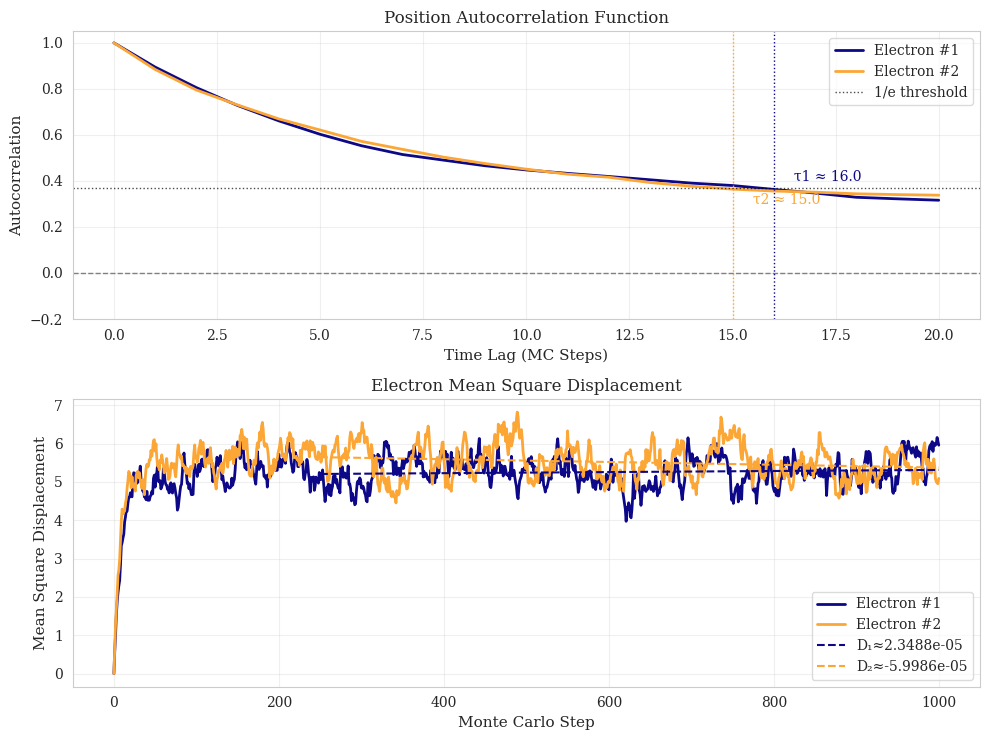

Analysis complete for !


{'Energy': '-1.051830 ± 0.007551',
 'Acceptance': '0.5066',
 'Max_Age_E1': '23',
 'Max_Age_E2': '25',
 'Autocorr_Time_E1': np.int64(15),
 'Diffusion_E1': '2.3488e-05',
 'Diffusion_E2': '-5.9986e-05'}

In [18]:
create_powerpoint_plots(results, save_plots=True, plot_dir ="./plots_Nconfig_SM_100", dpi = 300)

In [19]:
warnings.filterwarnings("ignore")

key = jax.random.PRNGKey(seed=42)

mol = pyscf.gto.M(
    atom="""
         H 0. 0. 0.;
         H 0. 0. 2.0
         """,
    basis="sto-3g",
    unit="bohr",
    verbose=0,
)

nconfig, seed = 1000, 42

coords, max_orb, det_coeff, det_map, mo_coeff, occup_hash, _nelec, nelec = \
    initialize_calculation(mol, nconfig, seed)
    
iscomplex, mo_dtype, get_phase = \
    determine_complex_settings(mo_coeff, det_coeff)

coords = jnp.array(coords)
atom_coords = jnp.array(mol.atom_coords())
atom_charges = jnp.array(mol.atom_charges())

In [20]:
results = vmc(
         coords = coords, 
         mol = mol,
         atom_charges = atom_charges,
         atom_coords = atom_coords,
         mo_coeff = mo_coeff, 
         det_coeff = det_coeff, 
         det_map = det_map, 
         _nelec = _nelec, 
         occup_hash = occup_hash,
         get_phase = get_phase,
         key = key, 
         equilibration_step=500, 
         tstep=0.5,
         n_blocks=10,
         nsteps_per_block=100,
         blockoffset=0,
         mode="symmetric",
         compute_autocorr=True,
         autocorr_length=20
      )

Starting equilibriation : 500 steps
Step 500 Acceptance: 0.5086910724639893
Starting production : 10 blocks of 100 steps
Block 1/10, Energy: -1.048434 ± 0.082876, Acceptance: 0.5086
Maximum ages: [25 20]
Block 2/10, Energy: -1.046468 ± 0.090131, Acceptance: 0.5067
Maximum ages: [25 28]
Block 3/10, Energy: -1.058138 ± 0.095561, Acceptance: 0.5072
Maximum ages: [25 32]
Block 4/10, Energy: -1.041365 ± 0.088064, Acceptance: 0.5065
Maximum ages: [25 32]
Block 5/10, Energy: -1.041487 ± 0.081861, Acceptance: 0.5093
Maximum ages: [29 32]
Block 6/10, Energy: -1.053448 ± 0.094970, Acceptance: 0.5053
Maximum ages: [29 34]
Block 7/10, Energy: -1.053078 ± 0.093607, Acceptance: 0.5060
Maximum ages: [29 34]
Block 8/10, Energy: -1.034049 ± 0.089303, Acceptance: 0.5050
Maximum ages: [29 34]
Block 9/10, Energy: -1.042554 ± 0.088771, Acceptance: 0.5081
Maximum ages: [29 34]
Block 10/10, Energy: -1.042949 ± 0.084907, Acceptance: 0.5066
Maximum ages: [29 34]

Final energy: -1.046197 ± 0.002155
Average acce

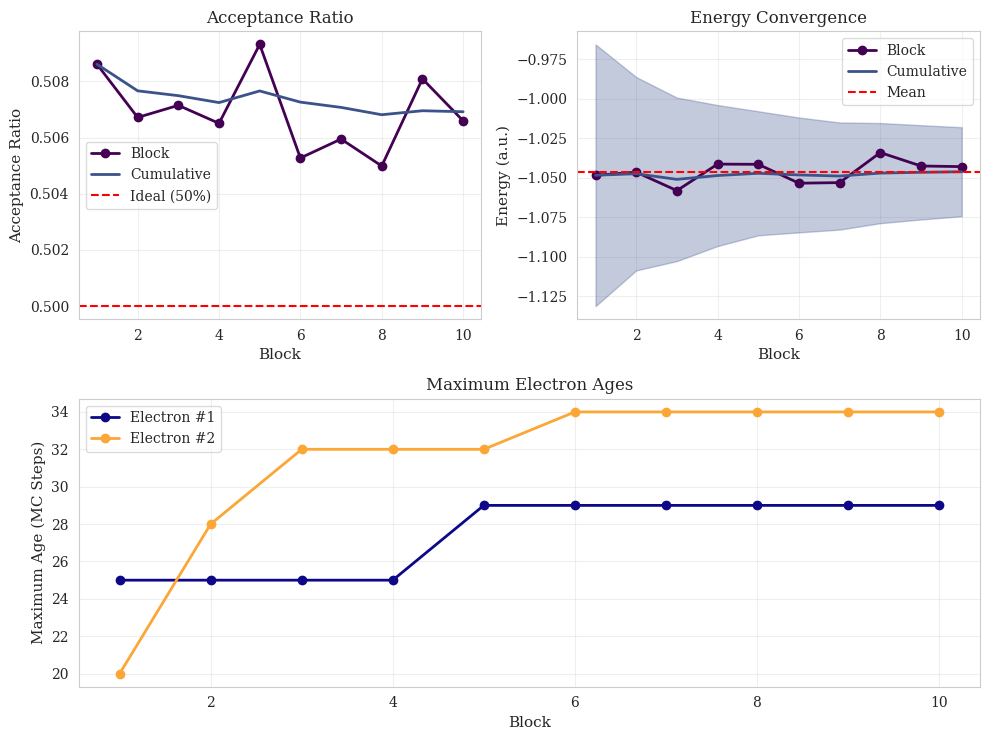

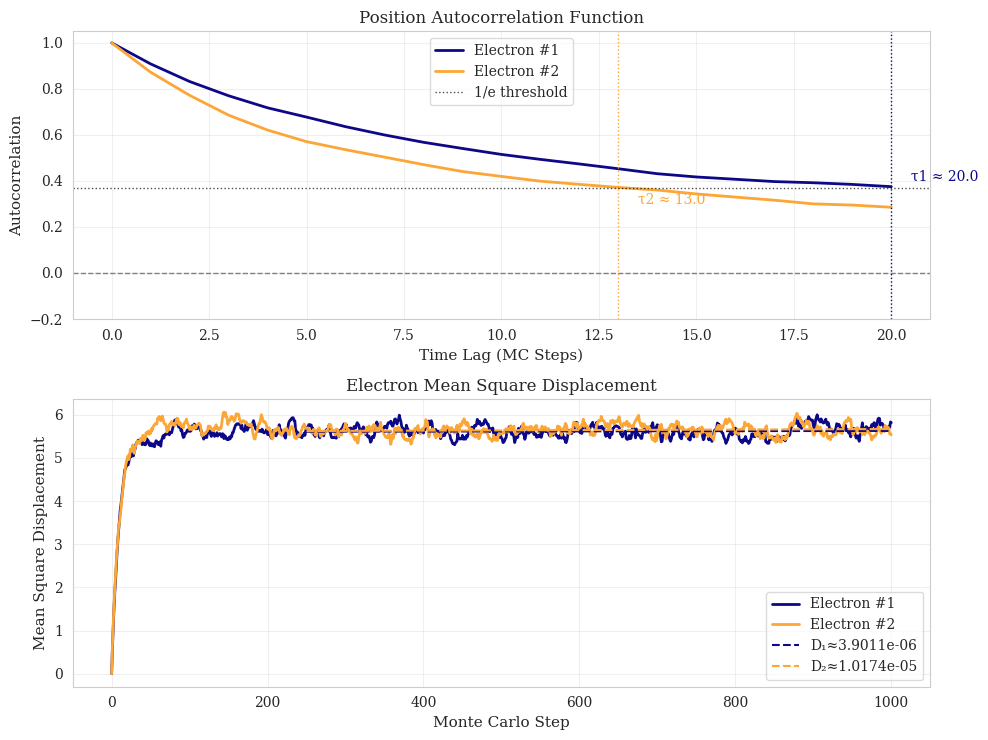

Analysis complete for !


{'Energy': '-1.046197 ± 0.002155',
 'Acceptance': '0.5069',
 'Max_Age_E1': '29',
 'Max_Age_E2': '34',
 'Autocorr_Time_E1': np.int64(13),
 'Diffusion_E1': '3.9011e-06',
 'Diffusion_E2': '1.0174e-05'}

In [21]:
create_powerpoint_plots(results, save_plots=True, plot_dir ="./plots_Nconfig_SM_1000", dpi = 300)